# Creating plots

## Import modules

In [2]:
# running locally, if you pip install then you just have to import the module
import numpy as np
import pandas as pd
import matplotlib as plt
import copy

try:
    import mutagenesis_visualization as mut
except ModuleNotFoundError: # This step is only for when I run the notebooks locally
    import sys
    sys.path.append('../../')
    import mutagenesis_visualization as mut

## Create object of class Screen

We will first load the sample datasets. They are part of the package. You would ignore this step if you are trying to use your own dataset.

In [ ]:
data_dict = mut.demo_datasets()  # load example datasets
hras_enrichment_GAPGEF = data_dict['array_hras_GAPGEF']
hras_enrichment_RBD = data_dict['array_hras_RBD']

In order to create plots, the first step is to create a ``Screen.object``. The enrichment scores will be passed using the parameter ``dataset`` . The protein sequence ``sequence`` and the amino acid substitutions order ``aminoacids`` need to be defined for the object to be created. Adding the secondary structure ``secondary`` is optional, but without it some plots will not work. In this example, we are importing two datasets and creating two objects named ``hras_GAPGEF`` and ``hras_RBD``.

In [5]:
# Load enrichment scores. This is how you would load them from a local file.
hras_enrichment_GAPGEF = np.genfromtxt('../data/HRas166_GAPGEF.csv',
                                       delimiter=',')

hras_enrichment_RBD = np.genfromtxt('../data/HRas166_RBD.csv',
                                    delimiter=',')


# Define protein sequence
hras_sequence = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEY'\
                + 'SAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVES'\
                + 'RQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPG'

# Order of amino acid substitutions in the hras_enrichment dataset
aminoacids = list('ACDEFGHIKLMNPQRSTVWY*')

# First residue of the hras_enrichment dataset. Because 1-Met was not mutated, the dataset starts at residue 2
start_position = 2

# Define secondary structure
secondary = [['L0'], ['β1']*(9-1), ['L1']*(15-9), ['α1']*(25-15), ['L2']*(36-25),
             ['β2']*(46-36), ['L3']*(48-46), ['β3']*(58-48), ['L4'] * (64-58),
             ['α2']*(74-64), ['L5']*(76-74), ['β4']*(83-76), ['L6']*(86-83),
             ['α3']*(103-86), ['L7']*(110-103), ['β5'] *
             (116-110), ['L8']*(126-116),
             ['α4']*(137-126), ['L9']*(140-137), ['β6'] *
             (143-140), ['L10']*(151-143),
             ['α5']*(172-151), ['L11']*(190-172)]

# Substitute Nan values with 0
fillna = 0

# Create objects
hras_GAPGEF = mut.Screen(hras_enrichment_GAPGEF, hras_sequence,
                         aminoacids, start_position, fillna, secondary)
hras_RBD = mut.Screen(hras_enrichment_RBD, hras_sequence,
                      aminoacids, start_position, fillna, secondary)

## Heatmaps

Once the object ``hras_RBD`` is created, we will plot a heatmap of the enrichment scores using the method ``object.heatmap``.

In [ ]:
# Create full heatmap
hras_RBD.heatmap(title='H-Ras 2-166', show_cartoon=True, output_file=None)

If you set the parameter ``hierarchical=True``, it will sort the columns using hierarchical clustering

In [ ]:
hras_RBD.heatmap(title='H-Ras 2-166', hierarchical=True, output_file=None)

You can change the scale and the color map using the parameters ``colorbar_scale`` and ``colormap``.

In [ ]:
# Load a color map from matplotlib
colormap = copy.copy((plt.cm.get_cmap('PuOr')))

# Change scale and colormap
hras_RBD.heatmap(title='H-Ras 2-166', colorbar_scale=(-2, 2),
                 colormap=colormap, show_cartoon=True, output_file=None)

If you set the parameter ``show_snv=True``, the algorithm will color green every mutation that is not a single nucleotide variant (SNV) of the wild-type protein. You will notice how many mutations are not accessible through a nucleotide change. This option may be useful to you so you can quickly evaluate which mutations are accessible through random DNA mutations. In the example of Ras, the frequency of non-SNV substitutions at residues 12 and 13 is dramatically lower.

In [ ]:
# Create full heatmap showing only SNV mutants
hras_RBD.heatmap(title='H-Ras 2-166', show_cartoon=True,
                 show_snv=True, output_file=None)

We can slice the full heatmap by either showing only some columns or some rows. To show only a few amino acid mutational profiles (rows), we will use the method ``object.heatmap_rows``. Note that we need to specify which amino acids to show with ``selection``.

In [ ]:
# Create heatmap of selected aminoacid substitutions
hras_RBD.heatmap_rows(title='H-Ras 2-166', selection=['E', 'Q', 'A', 'P', 'V', 'Y'],
                      output_file=None)

If we want to display only a few positions in the protein (columns), we will use the method ``object.heatmap_columns``. The parameter ``segment`` will indicate which are the contigous columns to show.

In [ ]:
# Create a heatmap of a subset region in the protein
hras_RBD.heatmap_columns(segment=[20, 40], output_file=None)

A summarized heatmap can also be generated. It is useful to evaluate global trends in the data. The command to use is ``object.miniheatmap``.

In [ ]:
# Condensed heatmap
hras_RBD.miniheatmap(title='Wt residue H-Ras', output_file=None)

## Histogram, scatter and more

There are different tools to analyze the data. The package can plot the kernel density estimation (``object.kernel``). There is the option to fit other functions to the data (see Implementation for more). You could also only plot a histogram (``object.histogram``). For the histograms, we can select to plot only the single nucleotide variants (SNVs) or the non-SNVs. In the example, it actually changes the shape of the population. Non-SNVs are more sensitive to mutations than SNVs because there is a higher proportion of non-conservative amino acid replacements. 

In [ ]:
# Plot kernel dist using sns.distplot.
hras_RBD.kernel(histogram=True, title='H-Ras 2-166', xscale=[-2, 1],
                output_file=None)

# Plot histogram of SNVs
hras_RBD.histogram(population='SNV', title='H-Ras 2-166 SNV', xscale=[-2, 1],
                   output_file=None)

# Plot histogram of non-SNVs
hras_RBD.histogram(population='nonSNV', title='H-Ras 2-166 non-SNV', xscale=[-2, 1],
                   output_file=None)

If you have multiple datasets and want to compare them, you can do it with the method ``object.scatter``. We give the option to do the comparison at a mutation by mutation level ``mode=pointmutant``, or at a position level ``mode=mean``.

In [ ]:
# Plot a scatter plot of each mutation
hras_RBD.scatter(hras_GAPGEF, title='Individual mutations', mode='pointmutant',
                 xscale=(-2.5, 1.5), yscale=(-2.5, 1.5), x_label='H-Ras Unregulated',
                 y_label='H-Ras Regulated', output_file=None)

# Plot a scatter plot of the mean position
hras_RBD.scatter(hras_GAPGEF, title='Positional average', mode='mean', xscale=(-2, 1),
                 yscale=(-2, 1), x_label='H-Ras Unregulated', y_label='H-Ras Regulated',
                 output_file=None)

The method ``object.rank`` sorts each mutation (or position) by its enrichment score. If ``outdf=True``, it will return a dataframe with the mutations ranked. This plot can now be done using plotly (see following chapter).

In [ ]:
# Rank plot
hras_RBD.rank(mode='pointmutant', outdf=True, title='Rank of mutations',
              output_file=None)

The method ``object.cumulative`` draws a cumulative plot that sums the mean enrichment score of every position. This  plot is useful to determine if the sensitivity to mutations is constant throughout the protein or not. In the example, we see that the cumulative function follows the x=y line, suggestion a homogeneous mutational tolerance. 


In [ ]:
# Cumulative plot
hras_RBD.cumulative(mode='all', title='Cumulative Score',
                    output_file=None)

## Bar and line charts

The method ``object.mean`` will plot the mean enrichment score for every position on a bar chart. It will be colored blue for loss of function and red for gain of function. Additionally, setting the parameter ``mode`` to an amino acid (using the one letter code) will plot the enrichment for that particular amino acid along the protein. In this example, we are showing the mean enrichment scores (top) and an alanine scan (bottom)

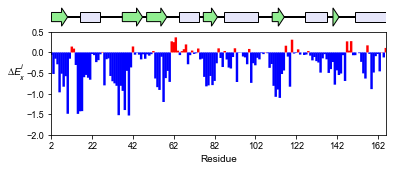

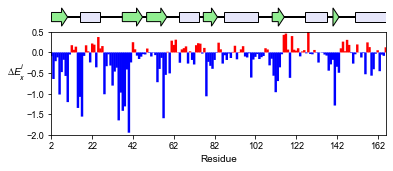

In [6]:
# Plot a bar graph with the mean enrichment score
hras_RBD.mean(figsize=[6, 2.5], mode='mean', show_cartoon=True, yscale=[-2, 0.5],
              title='', output_file=None)

# Plot a bar graph with the alanine enrichment score
hras_RBD.mean(figsize=[6, 2.5], mode='A', show_cartoon=True, yscale=[-2, 0.5],
              title='', output_file=None)

The mean differential effect between the two example datasets is displayed using the method ``object.differential``. This plot is useful to compare either orthologs/paralogs or the same protein with different effectors, and determine which areas of the protein have a different sensitivity to mutations.

In [ ]:
# Plot the difference between H-Ras unregulated and H-Ras regulated datasets
# The subtraction is hras_RBD - hrasGAPGEF
hras_RBD.differential(hras_GAPGEF, figsize=[6, 2.5], show_cartoon=True,
                      yscale=[-1, 1], title='', output_file=None)

You can check the individual mutational profile of a residue by using ``object.position``.

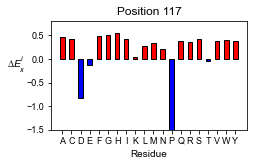

In [7]:
# Create plot for position 117
hras_RBD.position(position=117, yscale=(-1.5, 0.8), figsize=(3.5, 2),
                  title='Position 117', output_file=None)

If you added the secondary structure as an attribute of the object, you can plot the mean enrichment score for each alpha and beta motif in the protein (``object.secondary_mean``).

In [ ]:
# Graph bar of the mean of each secondary motif
hras_RBD.secondary_mean(yscale=[-1, 0], figsize=[3, 2], title='Mean of secondary motifs',
                        output_file=None)

## Correlation, PCA and ROC AUC

The correlation of amino acid substitution profiles can be calculated for each amino acid and graphed using ``object.correlation``. In the example we observe that polar amino acids have high correlation between themselves but low correlation with hydrophobic amino acids.

In [ ]:
# Correlation between amino acids
hras_RBD.correlation(
    colorbar_scale=[0.5, 1], title='Correlation', output_file=None)

The method ``object.individual_correlation`` will tell you how a single amino acid substitution profile (row of the heatmap) correlates to the rest of the dataset.

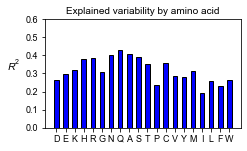

In [8]:
# Explained variability by amino acid
hras_RBD.individual_correlation(yscale=[0, 0.6], title='Explained variability by amino acid',
                                output_file=None)

In [ ]:
# Define groups of amino acids. The algorithm will pool one of each group and evaluate
# how well that subset correlates to the entires dataset
groups = ['DE', 'HKR', 'QN', 'CST', 'AG', 'ILMV', 'WYF', 'P']

# Get list of all combinations and their associated R2 value
df_r2 = hras_RBD.group_correlation(r2=0.75, groups=groups, output=True, title='',
                                   output_file=None)

# Only show the top 5
df_r2.sort_values(by='R2', ascending=False).head()

The package can perform principal component analysis (PCA) using the method ``object.pca``. The parameter ``mode`` can be set to ``aminoacid``, in which will cluster amino acids based on their similarity, ``individual`` in which will do the same for each individual residue and ``secondary``, in which will cluster for each motif. By default, the first two dimensions will be plotted (0 and 1 in Python notation), but that can be changed by ``dimensions`` parameter.

In [ ]:
# PCA by amino acid substitution
hras_RBD.pca(title='', dimensions=[0, 1], figsize=(2, 2), adjustlabels=True,
             output_file=None)

# PCA by secondary structure motif
hras_RBD.pca(title='', mode='secondary', dimensions=[0, 1], figsize=(2, 2),
             adjustlabels=True, output_file=None)

# PCA by each individual residue. Don't set adjustlabels = True unless really big figsize
hras_RBD.pca(title='', mode='individual', dimensions=[0, 1], figsize=(5, 5),
             adjustlabels=False, output_file=None)

Another type of plot that can be done is a receiver operating characteristic (ROC) curve for classification. You will use the method ``object.roc`` and as an input you will pass a dataframe that contains the label for each variant. In this example, we are using it to evaluate whether we can use evolutionary conservation data to predict the mutational tolerance of the protein. The area under the curve (AUC) is above 0.5, implying that there is a small relationship between enrichment/conservation.

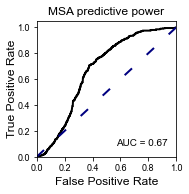

In [9]:
# Calculate conservation score from MSA
path = '../data/Ras_family_trimmed.fasta'
df_shannon, df_freq = mut.msa_enrichment(hras_RBD, path, start_position=1,
                                                       threshold=0.1)

# Plot ROC curve
hras_RBD.roc(df_freq[['Variant', 'Class']], title='MSA predictive power',
             output_file=None)

The package also allows to do a boxplot using the function ``plot_box``. Note that the data needs to be binned separately. In this example, we have used it to study if the Shannon entropy is related to the mutational tolerance. Although there is high variability, on average residues with a lower enrichment score are more conserved.

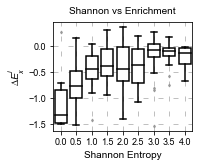

In [11]:
# Bin data
binned_shannon = (2*df_shannon['Shannon']).round(0)/2

# Plot box plot.
mut.plot_box(binned_x=binned_shannon, y=df_shannon['Score'],
        title='Shannon vs Enrichment', x_label='Shannon Entropy',
        y_label=r'$∆E^i_x$', output_file=None)

## 3-D scatter

The user can plot a 3-D scatter using the atomic coordinates of the C-alpha atoms of a PDB file. The method ``object.scatter_3D`` will take as an input either a PDB file or the x,y,z coordinates and plot a color-coded scatter. In the example, we can appreciate how mutation at the inner residues (hydrophobic) are loss of function (blue), and surface residues (green) are more tolerant to mutations. For the second plot, we have centered and squared the data. The closer to (0,0,0), the higher the amoung of blue residues. We have colored in lightblue the residues of Switch I of Ras, which are known to interact with RBD, the effector used in the assay. They are all loss of function and away from the origin. If you want to use the example pdbs, use the command ``pdbs_dict = mut.demo_pdbs()`` to retrieve the pdb_paths. 

In [ ]:
%matplotlib widget

# Plot 3-D plot
hras_RBD.scatter_3D(mode='mean', pdb_path='../data/5p21.pdb', squared=False,
                    lof=-0.5, gof=0.15)

# Plot 3-D plot, centering and squaring the distances
hras_RBD.scatter_3D(mode='mean', pdb_path='../data/5p21.pdb', squared=True,
                    lof=-0.5, gof=0.15)

# Calculate conservation score from MSA
path = '../data/Ras_family_trimmed.fasta'

# Load example MSA file (only if you are trying to reproduce the plots)
#path = demo_fasta()['ras']

df_shannon, df_freq = mut.msa_enrichment(hras_RBD, path, start_position=1,
                                         threshold=0.1)

# Plot 3-D SASA, B-factor and Shannon Entropy
hras_RBD.scatter_3D_pdbprop(plot=['SASA', 'Score', 'Shannon'], custom=df_shannon['Shannon'],
                            pdb_path='../data/5p21.pdb', color_by_score=True,
                            gof=0.15, lof=-0.5)

## Pymol

The data can be graphed on a Pymol object using ``object.pymol``. The parameter ``pdb`` will fetch the pdb that you want to use. Note that the protein chain needs to be specified (see example). Red for gain of function and blue for loss of function. ``mode`` lets you specifiy whether to plot the mean or an individual amino acid profile (left - Leucine, right - Aspartate).

In [ ]:
# Start pymol and color residues. Cut offs are set with gof and lof parameters.
hras_RBD.pymol(pdb='5p21_A', mode='mean', gof=0.2, lof=-0.5)

# Now check the mutational profile of Leucine (left image)
hras_RBD.pymol(pdb='5p21_A', mode='L', gof=0.2, lof=-0.5)

# Now check the mutational profile of Aspartate (right image)
hras_RBD.pymol(pdb='5p21_A', mode='D', gof=0.2, lof=-0.5)

## Art

The heatmap method can be used to generate artistic plots such as the one in the documentation overview. In here we show how that is done. On an Excel we have defined the color for each square in the heatmap (also available with the package, see ``logo.xlsx``). The first step is to import the excel file, and then we perform the same steps as in a normal dataset.

In [ ]:
%matplotlib inline

# Read excel file
path = '../data/logo.xlsx'
usecols = 'A:BL'
#df_logo = pd.read_excel(path, 'logo', usecols=usecols, nrows=21)
#df_faded = pd.read_excel(path, 'logo_faded', usecols=usecols, nrows=21)
df_logo = pd.read_excel(path, 'logo_2', usecols=usecols, nrows=21)
df_faded = pd.read_excel(path, 'logo_faded_2', usecols=usecols, nrows=21)

# Combine two dataframes
df_mixed = df_logo*1.2 - df_faded

# Aminoacids
aminoacids = list('ACDEFGHIKLMNPQRSTVWY*')

# Define protein sequence
sequence_logo = "FUNNY THAT YOU ARE READING THIS SEQUENCE. NO SECRET CODE FOR NOW"

# Define secondary structure
secondary = [['L0']*5, ['β1']*(9-1), ['L1']*(15-9), ['α1']*(25-20), ['L2']*(32-25),
             ['β2']*(42-32), ['L3']*(50-42), ['α2']*(58-50), ['L4']*(70-58)]

# Create object
logo_obj = mut.Screen(df_mixed, sequence_logo,
                      start_position=1, fillna=0, secondary=secondary)

# Create hetmap
logo_obj.heatmap(show_cartoon=True, title='',
                 neworder_aminoacids='ACDEFGHIKLMNPQRSTVWY*', output_file=None)

## Reference